In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Classification</center></h1>

A process for predicting <b>qualitative</b> or <b>categorical</b> variables is called as <b>Classification</b>.

### 4.1 An Overview of Classification 

The dataset used in this chapter will be <b>Default</b> dataset. We will predict that whether an individual will default on his/her credit card payment on the basis of annual income and monthly credit card balance. The data is displayed below:

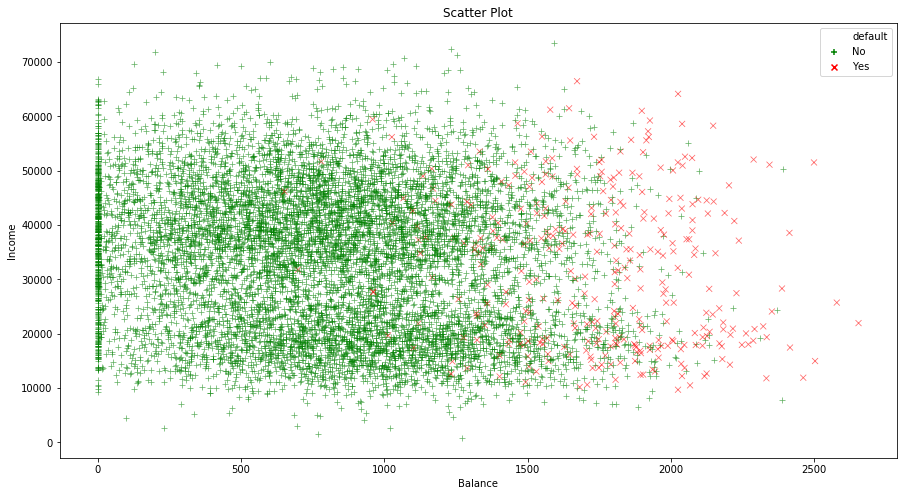

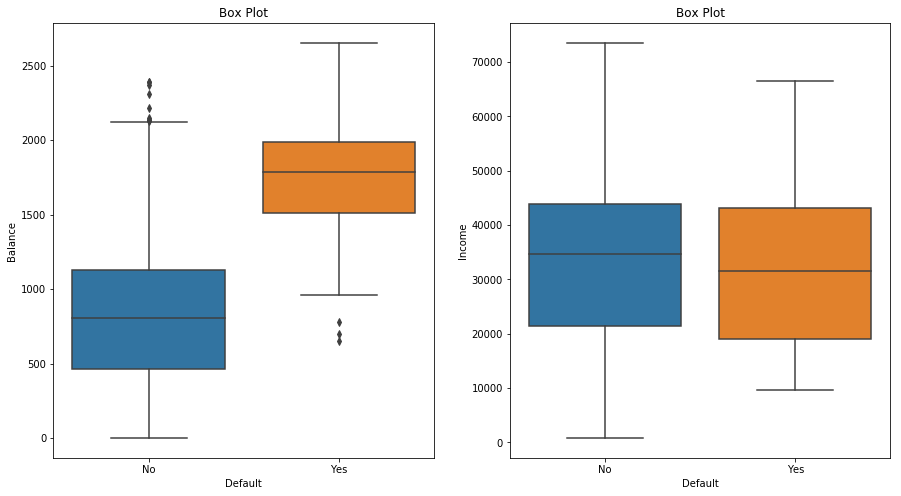

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

default = pd.read_excel("data/Default.xlsx")

markers = {"Yes": "x", "No": "+"}
palette = {"Yes": "red", "No": "green"}
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
sns.scatterplot(x="balance", y="income", hue="default", style="default", markers=markers, palette=palette,
                alpha=0.6, data=default)
ax.set_xlabel('Balance')
ax.set_ylabel('Income')
ax.set_title('Scatter Plot')

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(121)
sns.boxplot(x="default", y="balance", data=default)
ax.set_xlabel('Default')
ax.set_ylabel('Balance')
ax.set_title('Box Plot')

ax = fig.add_subplot(122)
sns.boxplot(x="default", y="income", data=default)
ax.set_xlabel('Default')
ax.set_ylabel('Income')
ax.set_title('Box Plot')


plt.show()

### 4.2 Why Not Linear Regression?

In general, there is no natural way to convert a qualitative response variable with more than two levels into a quantitative response that is ready for linear regression. For the binary qualitative response, we can simply encode the variables as 0 and 1 and predict the values taking 0.5 as threshold.

### 4.3 Logistic Regression

Rather than modeling the response directly, <b>logistic regression</b> models the probability that response $Y$ belongs to a particular category. For the Default data, logistic regression models the probability of default. The probability of default given balance can be written as $Pr \ (default=Yes \ | \ balance)$, and can be abbreviated as $p(balance)$. We can choose a threshold and then predict <b>default</b> as Yes if $p(balance) > 0.5$. If we want to be more conservative, we can lower the threshold.

#### 4.3.1 The Logistic Model 

The problem with using linear regression to predict a qualitative variable is that any time a straight line is fit to a binary response that is coded as 0 and 1, in principle we can always predict $p(X) < 0$ and $p(X) > 1$ for some values of X. To avoid this problem, we can use a function instead that gives output between 0 and 1 for all values of X. In logistic regression we use <b>logistic function</b>, which is given as:

$$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

and to fit the model, we can use <b>maximum likelihood</b>. The logistic function produces a <b>S-shaped</b> curve. Manipulating the above equation, we get:

$$\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1X}$$

The quantity on the left hand side is called as <b>odds</b> and can take any value between 0 and $\infty$. A lower and higher value of odds suggest a very low and high probabilities of default respectively. By taking the logarithm of both sides, we get:

$$log \bigg( \frac{p(X)}{1 - p(X)} \bigg) = \beta_0 + \beta_1X$$

The left hand side of above equation is called <b>log-odds</b> or <b>logit</b>. For a logistic regression model, <b>logit is linear in X.</b> The interpretation is as follows: For a one unit increase in X, the logit increases by $\beta_1$, or <b>odds is multiplied by $e^{\beta_1}$</b>.

The amount that $p(X)$ changes due to one unit change in X, depends on current value of X. If $\beta_1$ is positive, increasing X is associated with increasing $p(X)$. If $\beta_1$ is negative, increasing X is associated with decreasing $p(X)$. 

#### 4.3.2 Estimating the Regression Coefficients

Non-linear least squares can be used to fit the logistic regression model but a more general method of <b>maximum-likelihood</b> is preferred as it has better statistical properties. In maximum-likelihood, we seek estimates of $\beta_0$ and $\beta_1$ such that the predicted probabilities corresponds as closely as possible to the observed individual probabilities. In the case of the prediction of default status, by plugging in the values of $\beta$s in the model, we should get value of $p(X)$ for default as Yes close to 1 and for No, close to 0. This intution can be formalized using a mathematical equation called as <b>likelihood function</b>: 

$$l(\beta_0, \beta_1) = \prod_{i:y_i = 1} p(x_i) \prod_{i^{'}:y_{i^{'}} = 0} (1 - p(x_{i^{'}}))$$

The estimates are chosen to <b>maximize</b> this function. Maximum likelihood is a very general approach that can be used to fit many of the non-linear models.

In the logistic regression output, we can verify the statistical signifance of the model the same way as for the linear regression output. Instead of t-statistic, we use <b>z-statistic</b> which is defined the same ($\widehat{\beta_1} \ / \  SE(\widehat{\beta_1})$). The null hypothesis implies that $\beta_1 = 0$, i.e. $p(X) = \frac{e^{\beta_0}}{1 + e^{\beta_0}}$, which means the probability of default does not depend on balance. The main purpose of the intercept is to adjust the average fitted probability to the proportion of ones in the data.

#### 4.3.3 Making Predictions

The prediction step is similar to the linear regression as well. Qualitative variables can be used in the similar manner as the linear regression.

#### 4.3.4 Multiple Logistic Regression 

Multiple logistic regression can be modeled as:

$$p(X) = \frac{e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}}{1 + e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}}$$

$$log \bigg( \frac{p(X)}{1-p(X)} \bigg) = \beta_0 + \beta_1X_1 + ... + \beta_pX_p$$

<b>Confounding</b> is a phenomenon which explains the errors associated with logistic regression when results obtained using one predictor is quite different than the one using multiple predictors, especially when there is a correlation among the predictors.

#### 4.3.5 Logistic Regression for >2 Response Classes 

Multi-class logistic regression is not used much. Instead, <b>discriminant analysis</b> is popular for multi-class classification.

### 4.4 Linear Discriminant Analysis 

In logistic regression, we model the the conditional distribution of response $Y$ given the predictors $X$. As an alternative approach, we model the distribution of predictors X seperately for each of the response classe. We then use <b>Bayes' Theorem</b> to flip these around into estimates for <b>Pr(Y = k | X = x)</b>. When these distributions are assumed to be <b>normal</b>, this model is very similar to logistic regression. The advantage of LDA is as follows:

 - Fro well-seperated classes, the parameter estimates for the logistic regression model are unstable.
 - For small $n$ and the normal distribution of predictors $X$ for each classes, linear discriminant model is more stable.
 - LDA is popular when we have more than two response classes.

#### 4.4.1 Using Bayes’ Theorem for Classification

Let $\pi_k$ represents the <b>prior probability</b> that a randomly chosen observation comes from the $k$th class and $f_k(X) = Pr(X=x \ | \ Y=k)$ is the <b>density function</b> of $X$ for an observation that comes from the $k$th class. From Bayes' Theorem:

$$Pr(Y=k|X=x) \ Pr(X=x) = Pr(X=x|Y=k) \ Pr(Y=k)$$

$$Pr(Y=k|X=x) = \frac{Pr(X=x|Y=k) \ Pr(Y=k)}{Pr(X=x)}$$

From the definition of prior probability, $\pi_k = Pr(Y=k)$ and $Pr(X=x)$ can be computed by summing/integrating $Pr(X=x|Y=l) \ Pr(Y=l)$ over l. Hence, the equation reduces to:

$$p_k(X) = Pr(Y=k|X=x) = \frac{\pi_k \ f_k(X)}{Pr(X=x)} = \frac{\pi_k \ f_k(X)}{\sum_{l=1}^{k}\pi_lf_l(X)}$$

Hence, $p_k(X)$ can be computed by plugging in the estimates of $\pi_k$ and $f_k(X)$. $\pi_k$ can be computed easily by taking the fraction of training samples that belong to the class-k. Estimating $f_k(X)$ is challenging. $p_k(X)$ is called as the <b>posterior probability</b> that observation $X=x$ belongs to the class-k, given the value of $X$. <b>Hence, if we can estimate $f_k(X)$, we can develop a classifier that approximates the Bayes classifier.</b>

#### 4.4.2 Linear Discriminant Analysis for p = 1

In order to estimate $f_k(X)$, we need to make some assumption about it's form. Let us assume that it takes <b>Normal / Gaussian form</b>. In one dimensional settings, normal distribution is given as:

$$f_k(X) = \frac{1}{\sqrt{2\pi}\sigma_k} exp \bigg( {-\frac{1}{2\sigma_k^2}(x - \mu_k)^2} \bigg)$$

where $\mu_k$ and $\sigma_k^2$ are the mean and variance for $k$th class. Let us assume that $\sigma_1^2 = \sigma_2^2 = ... = \sigma_k^2 = \sigma^2$. Plugging this value, we get $p_k(X)$ as:

$$p_k(X) = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma} exp \bigg( {-\frac{1}{2\sigma^2}(x - \mu_k)^2} \bigg)}
{\sum_{l=1}^{k}\pi_l\frac{1}{\sqrt{2\pi}\sigma} exp \bigg( {-\frac{1}{2\sigma^2}(x - \mu_l)^2} \bigg)}$$

Bayes' classifier assigns $X=x$ to the class for which $p_k(X)$ is maximum. Taking the log and removing the constant terms, we get:

$$\delta_k(X) = log(\pi_k) - \frac{\mu_k^2}{2\sigma^2} + x.\frac{\mu_k}{\sigma^2}$$

which, we have to maximize (or we assign $X$ to the class for which this value is maximum). For <b>two-class case</b> (K=2), and assuming that the <b>prior probability of both the classes are same</b> ($\pi_1 = \pi_2$), we assign an observation to class-1 if :

$$log(\pi_1) - \frac{\mu_1^2}{2\sigma^2} + x.\frac{\mu_1}{\sigma^2} > 
log(\pi_2) - \frac{\mu_2^2}{2\sigma^2} + x.\frac{\mu_2}{\sigma^2}$$

$$2x(\mu_1 - \mu_2) > \mu_1^2 - \mu_2^2$$

Hence, for this case, the <b>bayes decision boundary corresponds to</b>

$$x = \frac{\mu_1^2 - \mu_2^2}{2(\mu_1 - \mu_2)} = \frac{\mu_1 + \mu_2}{2}$$

For example, for two classes 1 and 2, with the normal density functions $f_1(X)$ and $f_2(X)$ with $\mu_1 = -1, \mu_2 = 1, \sigma^2 = 1$, the bayes decision boundary is $x=0$. Hence, the Bayes classifier will assign the observation to class 1 if $x<0$ and class 2 otherwise.